# Visualizing Digital Gestures
### Uğurhan Aksu

In [1]:
import os
import pandas as pd
import re
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

## 1.The Data
The data is obtained from the following link as three seperate files for each axis of the coordinates. Row zero of each dataframe represents the class of the gesture according to gesture vocabulary considered by Liu et al. (2009). Similar codes are repeatedly used for x,y,z coordinates for obtaining different dataframe names and refraining from eval statements.
https://drive.google.com/drive/u/1/folders/13553neknux7U8why55KM1WrjgkA9IJKm
### 1.1 X-Coordinates

In [2]:
x_train_file = open( os.path.realpath("")+"/data/uWaveGestureLibrary_X_TRAIN", "r" )

x_array =[]
for line in x_train_file:
    temp_x = []
    for element in re.split( " ", line ):
        if element != "":
            temp_x.append( element )
    x_array.append( temp_x )
x_train_file.close()

x_data = pd.DataFrame(x_array)
x_data = x_data.astype(float)
del temp_x, x_array


x_data = x_data.T
col_labels = []
for i in x_data.columns.values:
    col_labels.append( "Instance "+str(i) )
x_data.columns = col_labels
x_data.head()

,Instance 0,Instance 1,Instance 2,Instance 3,Instance 4,Instance 5,Instance 6,Instance 7,Instance 8,Instance 9,...,Instance 886,Instance 887,Instance 888,Instance 889,Instance 890,Instance 891,Instance 892,Instance 893,Instance 894,Instance 895
0,6.000000,5.000000,5.000000,3.000000,4.000000,8.000000,7.000000,4.000000,4.00000,6.000000,...,2.000000,3.000000,4.000000,6.000000,5.000000,3.000000,1.00000,2.000000,7.000000,5.000000
1,-0.304243,1.627311,0.661277,0.005185,1.286198,-0.479252,1.474328,0.305303,0.98081,-1.177078,...,0.550959,-0.055721,0.940879,0.452726,-1.122223,0.117811,-1.23259,0.282877,1.248704,-0.168518
2,-0.304243,1.627311,0.661277,0.005185,1.286198,-0.479252,1.474328,0.305303,0.98081,-1.177078,...,0.550959,-0.055721,0.940879,0.452726,-1.122223,0.117811,-1.23259,0.282877,1.248704,-0.168518
3,-0.304243,1.627311,0.661277,0.005185,1.286198,-0.479252,1.474328,0.305303,0.98081,-1.177078,...,0.550959,-0.055721,0.940879,0.452726,-1.122223,0.117811,-1.23259,0.282877,1.248704,-0.168518
4,-0.304243,1.627311,0.661277,0.005185,1.286198,-0.479252,1.474328,0.305303,0.98081,-1.177078,...,0.550959,-0.055721,0.940879,0.452726,-1.122223,0.117811,-1.23259,0.282877,1.248704,-0.168518


### 1.2 Y-Coordinates

In [10]:
y_train_file = open( os.path.realpath("")+"/data/uWaveGestureLibrary_Y_TRAIN", "r" )

y_array =[]
for line in y_train_file:
    temp_y = []
    for element in re.split( " ", line ):
        if element != "":
            temp_y.append( element )
    y_array.append( temp_y )
y_train_file.close()

y_data = pd.DataFrame(y_array)
y_data = y_data.astype(float)
y_data = y_data.T
del temp_y, y_array

y_data.columns = col_labels
y_data.tail()

,Instance 0,Instance 1,Instance 2,Instance 3,Instance 4,Instance 5,Instance 6,Instance 7,Instance 8,Instance 9,...,Instance 886,Instance 887,Instance 888,Instance 889,Instance 890,Instance 891,Instance 892,Instance 893,Instance 894,Instance 895
311,0.084123,-1.662524,-1.49249,-1.933636,-2.229514,0.134975,-0.441819,-0.928307,-2.158487,0.857259,...,0.596189,-0.178238,-2.189017,0.746480,-1.433124,-0.619604,-0.434216,0.375085,-0.157535,-0.886777
312,0.084123,-1.662524,-1.49249,-1.917323,-2.185212,0.154287,-0.463722,-0.928307,-2.158487,0.923908,...,0.637008,-0.151578,-2.196837,0.763822,-1.434425,-0.603635,-0.437178,0.328692,-0.157535,-0.820651
313,0.084123,-1.662524,-1.49249,-1.660378,-2.127210,0.173598,-0.490608,-0.928307,-2.158487,0.990682,...,0.675603,-0.123262,-2.196837,0.781165,-1.434425,-0.576997,-0.437178,0.316739,-0.182466,-0.754525
314,0.084123,-1.662524,-1.49249,-1.374903,-2.069209,0.192910,-0.494129,-0.928307,-2.158487,1.057456,...,0.685090,-0.094946,-2.196837,0.798508,-1.434425,-0.544353,-0.437178,0.316739,-0.220348,-0.688399
315,0.084123,-1.662524,-1.49249,-1.089428,-2.011207,0.212222,-0.494129,-0.928307,-2.158487,1.124230,...,0.685090,-0.066630,-2.196837,0.815850,-1.434425,-0.511710,-0.437178,0.316739,-0.269599,-0.622273


### 1.3 Z-Coordinates

In [4]:
z_train_file = open( os.path.realpath("")+"/data/uWaveGestureLibrary_Z_TRAIN", "r" )

z_array =[]
for line in z_train_file:
    temp_z = []
    for element in re.split( " ", line ):
        if element != "":
            temp_z.append( element )
    z_array.append( temp_z )
z_train_file.close()

z_data = pd.DataFrame(z_array)
z_data = z_data.astype(float)
z_data = z_data.T
del temp_z, z_array


z_data.columns = col_labels
z_data.head()

,Instance 0,Instance 1,Instance 2,Instance 3,Instance 4,Instance 5,Instance 6,Instance 7,Instance 8,Instance 9,...,Instance 886,Instance 887,Instance 888,Instance 889,Instance 890,Instance 891,Instance 892,Instance 893,Instance 894,Instance 895
0,6.000000,5.000000,5.000000,3.000000,4.000000,8.000000,7.000000,4.000000,4.000000,6.00000,...,2.000000,3.000000,4.000000,6.00000,5.000000,3.000000,1.000000,2.000000,7.000000,5.000000
1,-1.528965,1.786869,0.521249,0.309455,-0.466022,0.656401,1.237417,-1.298718,-0.695129,-1.31949,...,1.623807,-0.617287,0.243388,-0.44537,1.283402,-0.157293,-1.363625,0.111628,0.313053,0.546955
2,-1.528965,1.786869,0.521249,0.309455,-0.466022,0.656401,1.237417,-1.298718,-0.695129,-1.31949,...,1.623807,-0.617287,0.243388,-0.44537,1.283402,-0.157293,-1.363625,0.111628,0.313053,0.546955
3,-1.528965,1.786869,0.521249,0.309455,-0.466022,0.656401,1.237417,-1.298718,-0.695129,-1.31949,...,1.623807,-0.617287,0.243388,-0.44537,1.283402,-0.157293,-1.363625,0.111628,0.313053,0.546955
4,-1.528965,1.786869,0.521249,0.309455,-0.466022,0.656401,1.237417,-1.298718,-0.695129,-1.31949,...,1.623807,-0.617287,0.243388,-0.44537,1.283402,-0.157293,-1.363625,0.111628,0.313053,0.546955


## 2.Plots
The following function plots a given gesture instance. An example plot is provided.

In [5]:
def plotGesture(i=500):
    
    fig = plt.figure( figsize=(27,15) )
    ax = fig.gca(projection='3d')

    ax.scatter(x_data.iloc[:,i][1],
              y_data.iloc[:,i][1],
              z_data.iloc[:,i][1],
              color="green",
               marker="D",
              s=250,
              label="Motion Start")

    ax.scatter(x_data.iloc[:,i][x_data.shape[0]-1],
               y_data.iloc[:,i][y_data.shape[0]-1],
               z_data.iloc[:,i][z_data.shape[0]-1],
               color="red",
               marker="v",
               s=250,
               label="Motion End")

    ax.plot(x_data.iloc[1::,i],
            y_data.iloc[1::,i],
            z_data.iloc[1::,i],
            linewidth=5,
            label="Motion Path")

    ax.legend( fontsize="x-large" )
    plt.title("Gesture No: "+str(i+1)+"\n"+
              "Gesture Class: "+str(x_data.iloc[:,i][0]), fontsize=25)

    plt.show()
    

/var/folders/jn/grj6h1j13kq9dtlgt1j43cp40000gn/T/ipykernel_3766/1999113529.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


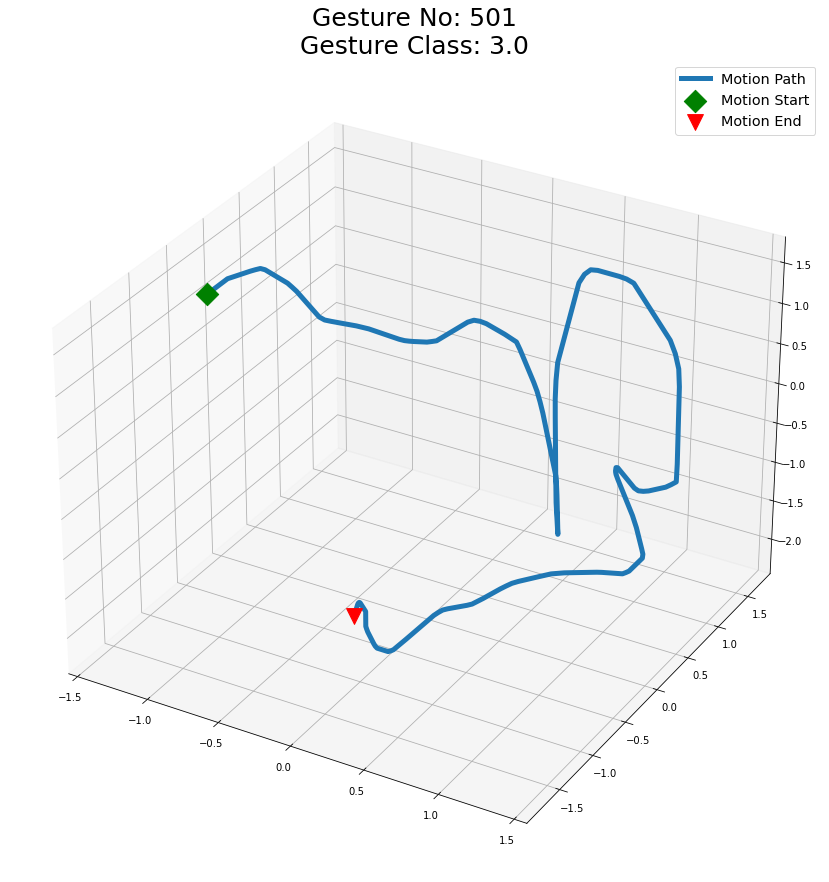

In [6]:
plotGesture()

An example for each gesture type can be found below.

/var/folders/jn/grj6h1j13kq9dtlgt1j43cp40000gn/T/ipykernel_3766/1999113529.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


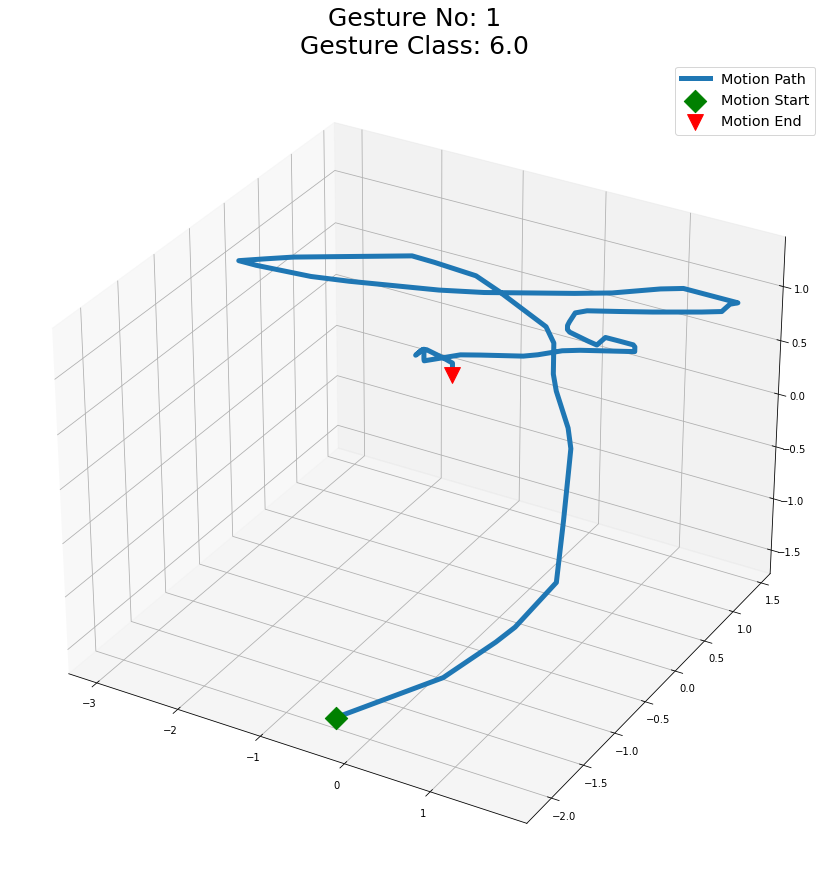

/var/folders/jn/grj6h1j13kq9dtlgt1j43cp40000gn/T/ipykernel_3766/1999113529.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


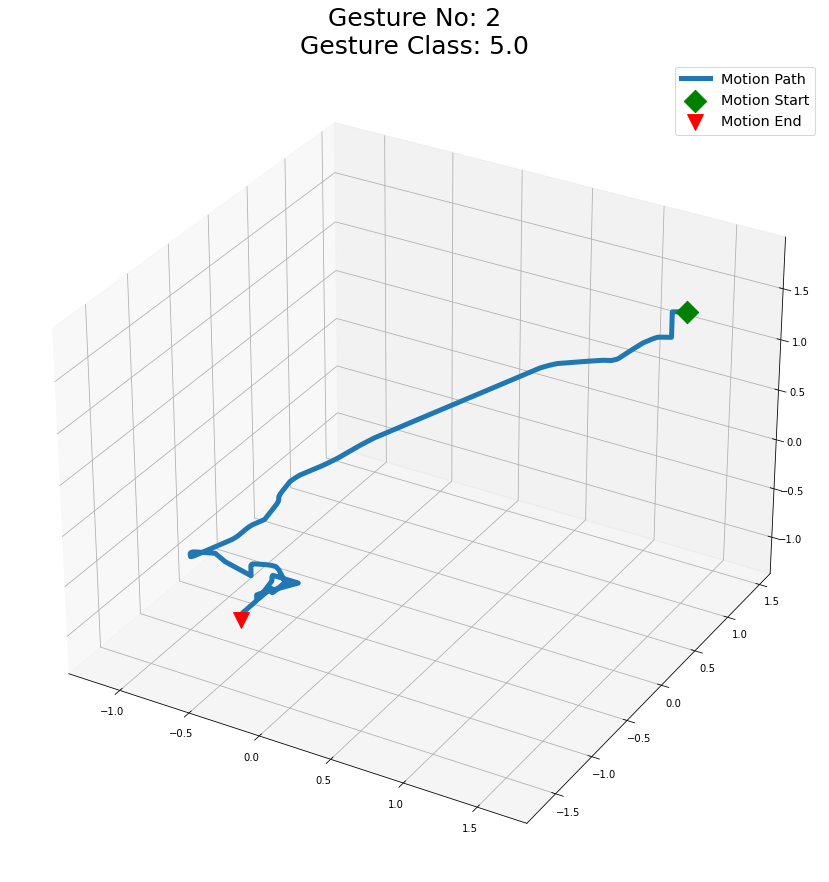

/var/folders/jn/grj6h1j13kq9dtlgt1j43cp40000gn/T/ipykernel_3766/1999113529.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


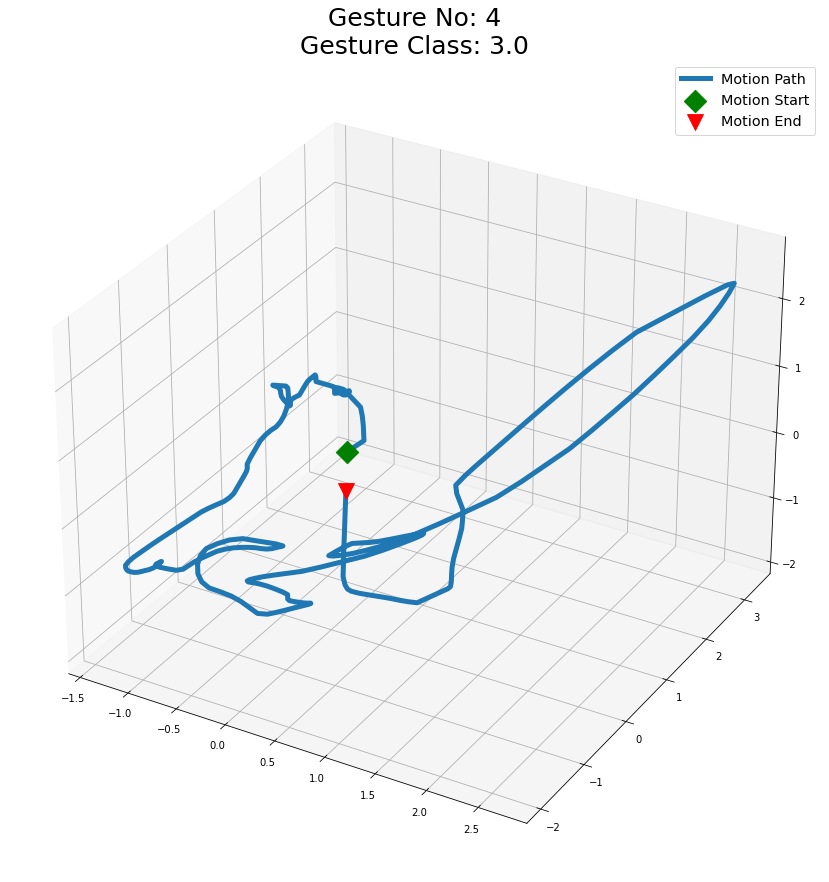

/var/folders/jn/grj6h1j13kq9dtlgt1j43cp40000gn/T/ipykernel_3766/1999113529.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


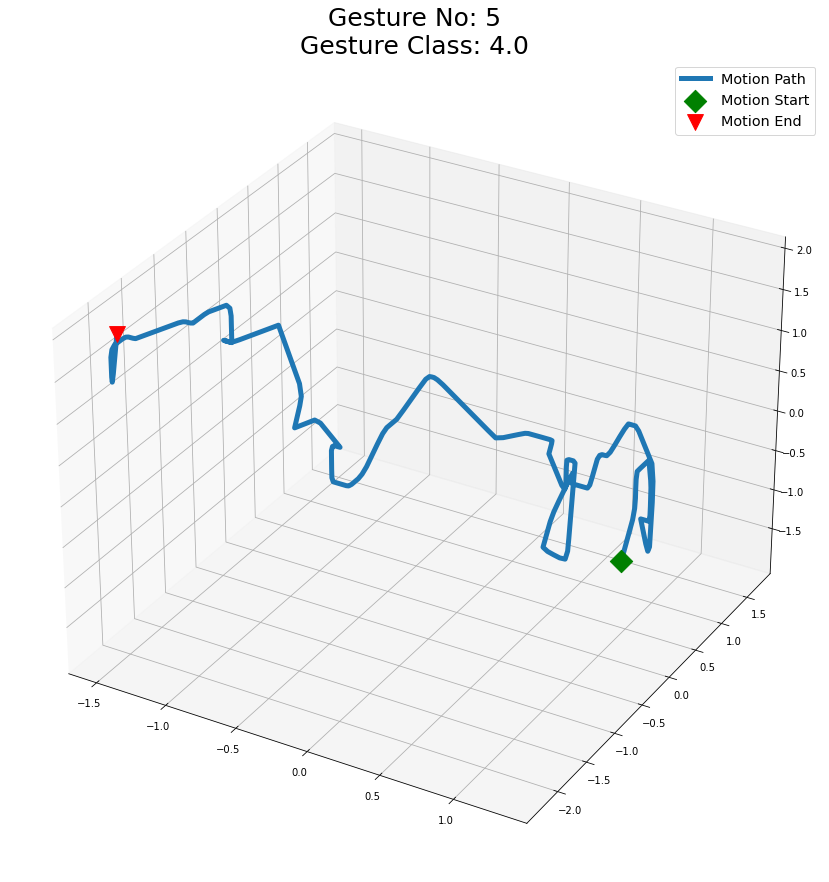

/var/folders/jn/grj6h1j13kq9dtlgt1j43cp40000gn/T/ipykernel_3766/1999113529.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


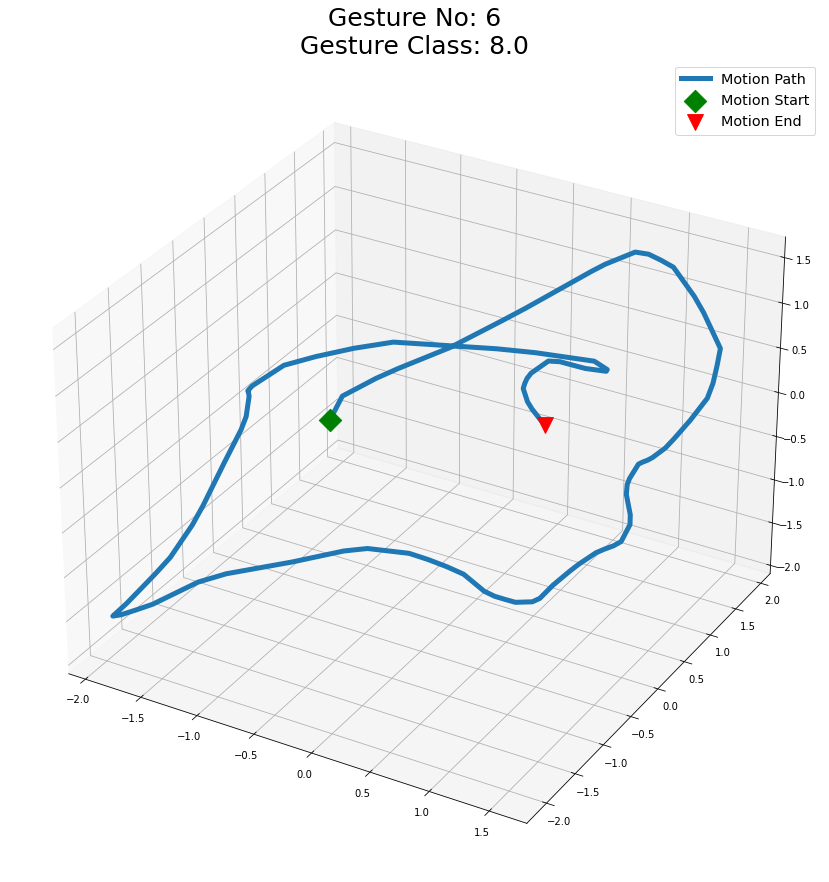

/var/folders/jn/grj6h1j13kq9dtlgt1j43cp40000gn/T/ipykernel_3766/1999113529.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


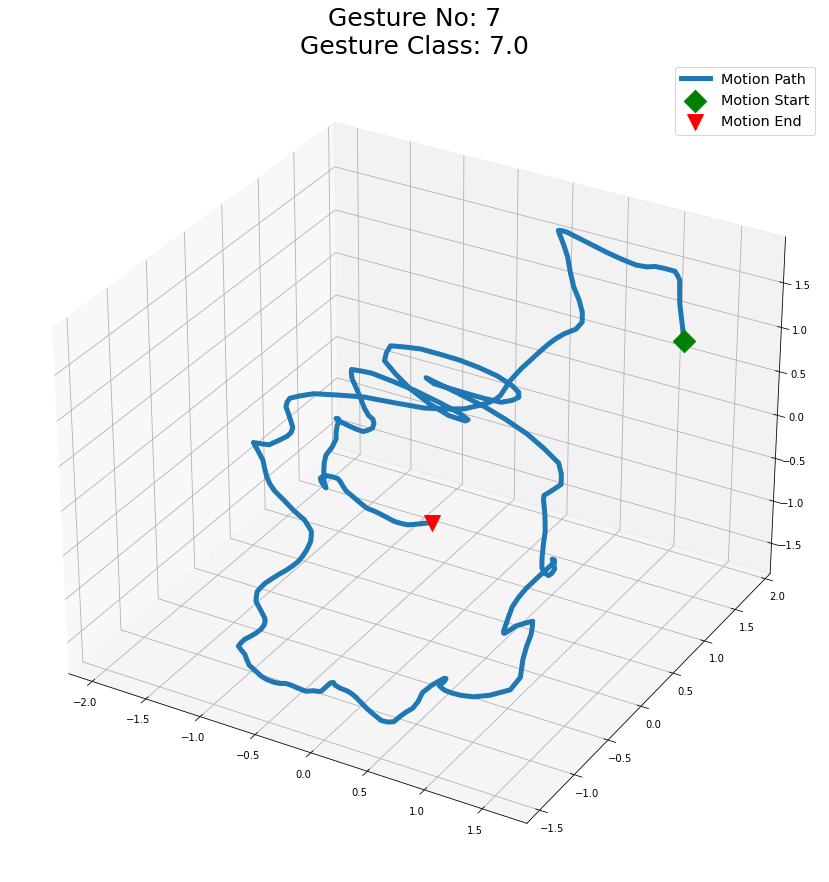

/var/folders/jn/grj6h1j13kq9dtlgt1j43cp40000gn/T/ipykernel_3766/1999113529.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


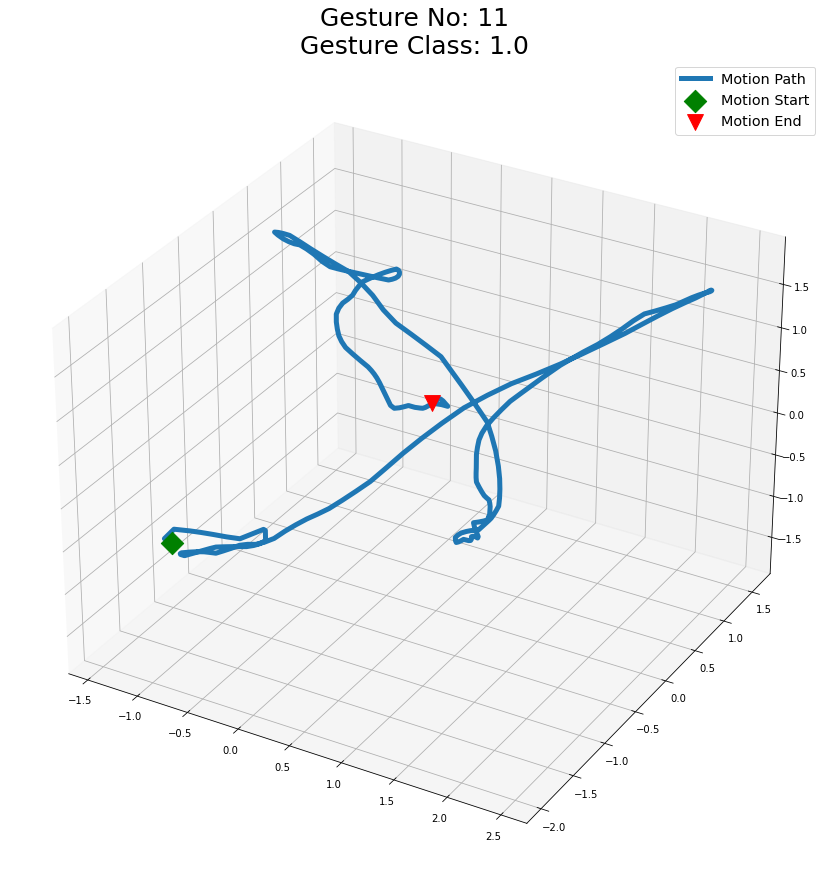

/var/folders/jn/grj6h1j13kq9dtlgt1j43cp40000gn/T/ipykernel_3766/1999113529.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


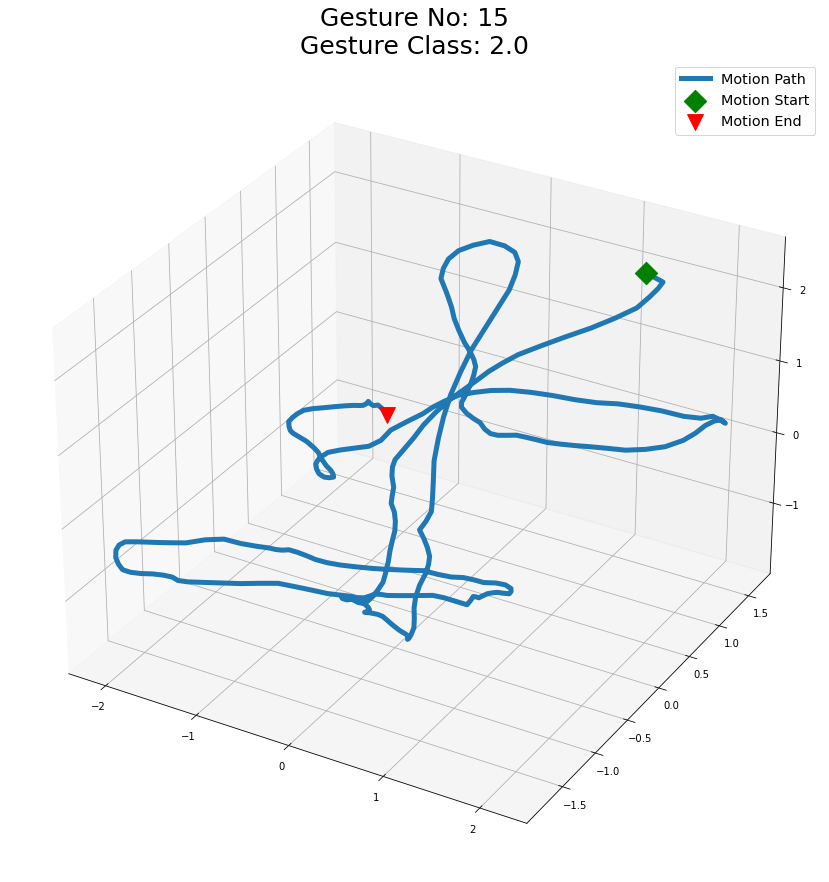

In [7]:
sample_set = [ np.linspace(1,int(max(x_data.iloc[0,:])),int(max(x_data.iloc[0,:]))) ]
sample_set = list(sample_set[0])
i=0
while len( sample_set )>0:
    if sum((sample_set == x_data.iloc[0,:].values[i])) >0:
        
        plotGesture(i)
        del sample_set[ np.argwhere(sample_set == x_data.iloc[0,:].values[i])[0][0] ]
        i=i+1
        
    else:
            i=i+1
    


## 3. Conclusions
However, 3D plots accurately represented the gestures, displayed gestures possess far more distortion when compared to gesture vocabulary considered by Liu et al. (2009). This difference is most likely caused by noise captured by the accelerometer or less likely by shortage of elements in the gesture vocabulary.